# Research of ads for the sale of apartments

The customer is a service of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. The task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity. 

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

## Data Preparation and Exploration

In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [717]:
data = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_02/real_estate_data.csv', sep='\t')

In [718]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [719]:
data.sample(frac=0.1, random_state=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.0,47.0,2018-03-30T00:00:00,1,3.00,10.0,NaN,4,NaN,...,NaN,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
13876,12,2290000.0,40.0,2016-01-17T00:00:00,2,3.00,3.0,27.000000,2,False,...,7.4,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,895.0
3586,0,5450000.0,53.8,2018-02-01T00:00:00,2,2.85,2.0,36.500000,2,NaN,...,5.3,1.0,Санкт-Петербург,38914.0,10617.0,1.0,255.0,0.0,NaN,64.0
6495,1,5482990.0,66.1,2016-02-19T00:00:00,2,NaN,25.0,43.600000,1,NaN,...,11.1,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
14431,5,4190000.0,54.0,2017-10-30T00:00:00,2,3.00,12.0,34.000000,3,NaN,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15474,14,3920000.0,33.9,2018-03-21T00:00:00,1,2.64,17.0,15.200000,14,NaN,...,7.1,1.0,Санкт-Петербург,25565.0,14075.0,0.0,NaN,0.0,NaN,258.0
5987,1,3970000.0,50.0,2017-08-17T00:00:00,2,NaN,9.0,31.000000,1,NaN,...,8.0,1.0,Санкт-Петербург,12669.0,12581.0,0.0,NaN,1.0,335.0,45.0
3011,16,3600000.0,50.2,2016-05-26T00:00:00,2,2.54,9.0,30.900002,6,False,...,6.2,1.0,Санкт-Петербург,41786.0,10666.0,1.0,677.0,0.0,NaN,173.0
4838,10,1600000.0,43.0,2019-04-06T00:00:00,2,NaN,5.0,NaN,5,NaN,...,NaN,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Comment
There are missing values in 14 columns.

In [720]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Summary

The studied data on the real estate market in St. Petersburg and the Leningrad region is a table consisting of 23699 rows and 22 columns containing various types of data. Only 8 columns of the table are completely filled and do not contain gaps. To prepare the data for working with them, we have to eliminate omissions and abnormal values, change the data types in the columns we are interested in, based on the tasks assigned to the study.

## Data preprocessing and research

In [721]:
# Remove the gaps in the column with the names of the locality. Their number is small, and the significance of these data is high.
data.dropna(subset=['locality_name'], inplace=True)

In [722]:
# Put the names of settlements in order by replacing all the "e" in their names with "e".
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [723]:
# Replace the gaps in the ceiling height data with median values, grouping them by the location of these apartments.
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['ceiling_height'].isna().sum()

106

In [724]:
# For the remaining 106, with unique location data, replace the gaps with a common median value.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [725]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'].isna().sum()

4864

### Comment
In the column with the distance to the city center, only a small part of the gaps were filled in. It would be incorrect to fill in the remaining almost five thousand gaps with the median value, especially since the data in this column is very versatile.

In [726]:
# Delete 85 lines with missing values about the number of storeys of buildings.
data.dropna(subset=['floors_total'], inplace=True)

In [727]:
# Assuming that the gaps in the data on the number of balconies indicate their absence, replace them with 0.
data['balcony'] = data['balcony'].fillna(0)

In [728]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data['living_area'].isna().sum()

133

### Comment
We replace the missing data on the living area, grouped by total area, with median values. We will not delete the remaining gaps, we will try to come up with something else for them.

In [729]:
# Calculate the median ratio of residential and total area.
median_ratio_living_total = (data['living_area'] / data ['total_area']).median()
median_ratio_living_total

0.5709677419354838

In [730]:
# Create a function that replaces the missing values of the living area with the product of the total area and, previously obtained, the median of the ratio of these areas.
def living_area_from_median_ratio(row):
    living = row['living_area']
    total = row['total_area']
    
    if living > 0:
        return living
    return total * median_ratio_living_total


data['living_area'] = data.apply(living_area_from_median_ratio, axis=1)

In [731]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['kitchen_area'].isna().sum()

185

In [732]:
median_ratio_kitchen_total = (data['kitchen_area'] / data ['total_area']).median()
median_ratio_kitchen_total

0.1713505331051731

In [733]:
# With the missing values in the kitchen area, we act similarly to the missing values in the living area.
def kitchen_area_from_median_ratio(row):
    kitchen = row['kitchen_area']
    total = row['total_area']
    
    if kitchen > 0:
        return kitchen
    return total * median_ratio_kitchen_total


data['kitchen_area'] = data.apply(kitchen_area_from_median_ratio, axis=1)

### Data type converting

In [734]:
# Information about the date of publication of the announcement will be reformatted into a temporary format.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [735]:
# Change the data types in columns without omissions and data that does not imply fractional values to integers.
data['last_price'] = data['last_price'].astype('int')
data['rooms'] = data['rooms'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [736]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Summary

There are now no gaps in most of the columns. During data preprocessing, only 134 rows were deleted, which was only 0.5% of the original number. Deleting an insignificant part of the data with omissions will affect the results of the study less negatively than replacing omissions with median values. Changing the data types in columns containing integers will provide comfort when working with data by cutting off the "fractional tails" from the numbers, and in order to work with dates, and not with numbers similar to dates, we assigned the necessary data type to the corresponding column.

## Calculations and adding results to the table

In [737]:
# Add a column with calculations of the cost per square meter.
data['price_per_m2'] = data['last_price'] / data ['total_area']

In [738]:
# Create and add columns to the table containing information about the year, month and day of the week of the publication of the sale announcement.
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday

In [739]:
# Categorize the floor data and add this data to a new column.
def floor_categorization(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'

    return 'другой'

data['floor_cat'] = data.apply(floor_categorization, axis=1)
data['floor_cat'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_cat, dtype: int64

In [740]:
# Calculate the ratio of living and kitchen areas to the total area.
data['living_to_total_ratio'] = data['living_area'] / data ['total_area']
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data ['total_area']

### Summary

In this section, calculations were made, the results of which were added to the table, in accordance with the tasks assigned to the study.

## Exploratory Data Analysis

### Investigation of the main parameters. Search and elimination of rare and erratic values.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

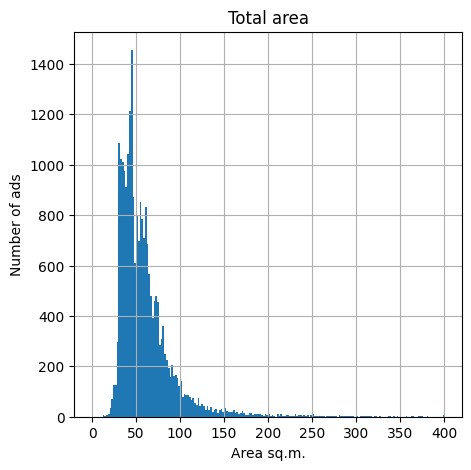

In [741]:
data['total_area'].plot(kind='hist', bins=200, range = (0, 400), figsize = (5, 5), grid=True, title='Total area')
plt.xlabel('Area sq.m.')
plt.ylabel('Number of ads')
data['total_area'].describe()

In [742]:
data['total_area'].quantile(0.95)

116.0

#### Comment
As you can see from the graph, the main part of the premises sold has an area of less than 100 sq.m. At the same time, the average value is 60 sq.m., and the median is 52 sq.m. The average value is overestimated by the presence of rooms with a very large quadrature in the data under study (the maximum value is 900 sq.m.). Despite the fact that these data cannot be considered abnormal, in order to avoid distortion of the main indicators, we will establish a 95% percentile in order to subsequently get rid of the remaining 5% of ads with a very large quadrature.

,price_per_m2
count,23565
mean,99406
std,50389
min,112
25%,76566
50%,95000
75%,114213
max,1907500


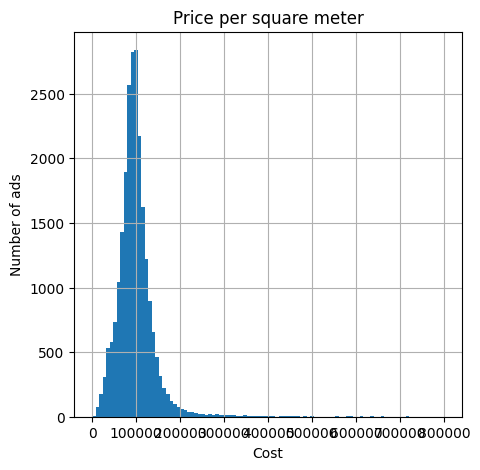

In [743]:
data['price_per_m2'].plot(kind='hist', bins=100, range = (0, 800000), figsize = (5, 5), grid=True, title='Price per square meter')
plt.xlabel('Cost')
plt.ylabel('Number of ads')
data[['price_per_m2']].describe().style.format({'price_per_m2': '{:.0f}'})

In [744]:
data['price_per_m2'].quantile(0.95)

160714.2857142857

#### Comment
The cost per square meter of almost all premises for sale does not exceed 200 thousand. The average and median indicators are almost equal and are kept at the level of 95-99 thousand. The values in 95% of the data presented do not exceed 161 thousand per square meter.

,last_price
count,23565.0
mean,6540058.3
std,10910934.7
min,12190.0
25%,3400000.0
50%,4646000.0
75%,6790000.0
max,763000000.0


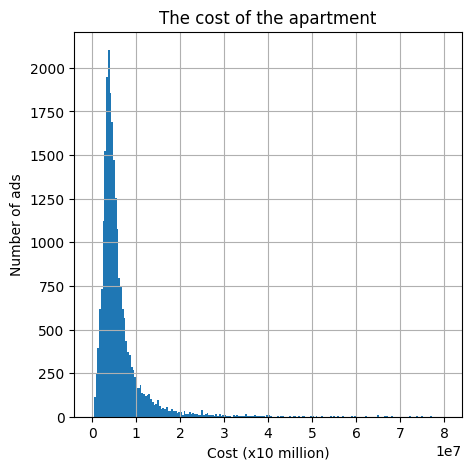

In [745]:
data['last_price'].plot(kind='hist', bins=200, range = (0, 80000000), figsize = (5, 5), grid=True, title='The cost of the apartment')
plt.xlabel('Cost (x10 million)')
plt.ylabel('Number of ads')
data[['last_price']].describe().style.format({'last_price': '{:.1f}'})

In [746]:
data['last_price'].quantile(0.95)

15300000.0

#### Comment
On the resulting histogram, we see that the bulk of the ads for the sale of premises worth less than 10 million. The average value is 6.5 million, the median is 4.6 million. The shift of the average to higher values is caused by the presence of very expensive premises in the data. 95% of values less than - 15.3 million.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

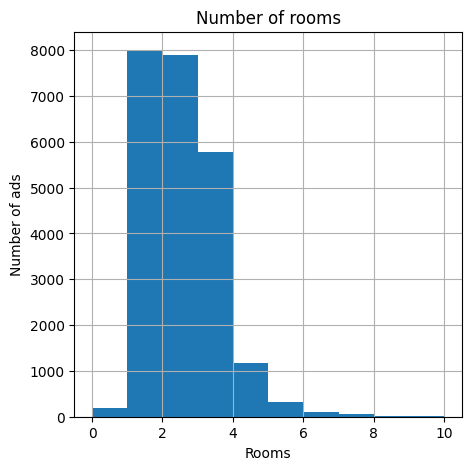

In [747]:
data['rooms'].plot(kind='hist', bins=10, range = (0, 10), figsize = (5, 5), grid=True, title='Number of rooms')
plt.xlabel('Rooms')
plt.ylabel('Number of ads')
data['rooms'].describe()

In [748]:
data['rooms'].quantile(0.95)

4.0

#### Comment
The prevailing part of the premises sold have from 1st to 3 rooms, which is why the average and median in this case are solid and give out indicators of 2 rooms. Let's calculate which data is within the 95% quantile.

count    23565.000000
mean         2.732308
std          1.004402
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

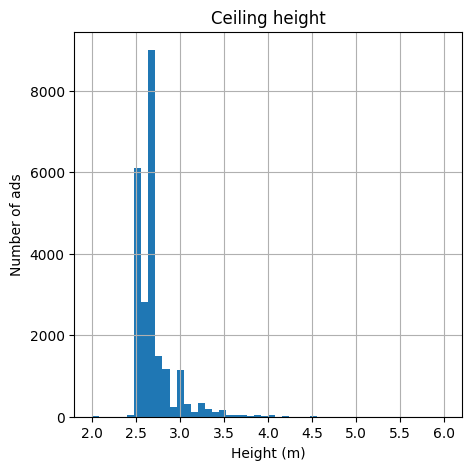

In [749]:
data['ceiling_height'].plot(kind='hist', bins=50, range = (2, 6), figsize = (5, 5), grid=True, title='Ceiling height')
plt.xlabel('Height (m)')
plt.ylabel('Number of ads')
data['ceiling_height'].describe()

In [750]:
data['ceiling_height'].quantile(0.95)

3.15

#### Comment
The average and median ceiling height is 2.7 meters, almost all ceiling height data is enclosed in frames from 2.5 to 3 meters. Only 5% of all data (which even has a 100-meter ceiling height) have values above 3.15 meters.

,days_exposition
count,20394
mean,181
std,220
min,1
25%,45
50%,95
75%,231
max,1580


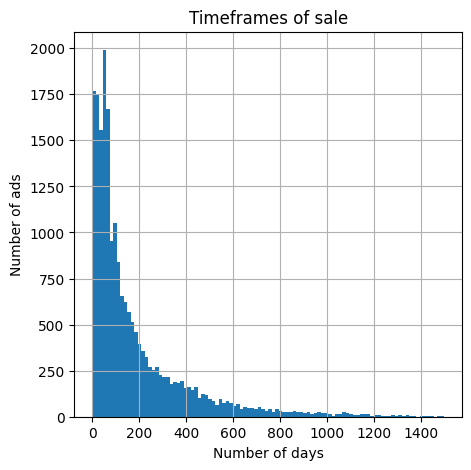

In [751]:
data['days_exposition'].plot(kind='hist', bins=100, range = (0, 1500), figsize = (5, 5), grid=True, title='Timeframes of sale')
plt.xlabel('Number of days')
plt.ylabel('Number of ads')
data[['days_exposition']].describe().style.format({'days_exposition': '{:.0f}'})

In [752]:
data['days_exposition'].quantile(0.95)

647.3499999999985

#### Comment
The average number of days for which an apartment is sold is 181, the median is 95 days. 95% of sales were made in less than 647 days.

In [753]:
# Create a new dataframe that excludes 5% of the high values in the studied columns.
data_1 = data.query('total_area <= 116 \
                    and price_per_m2 <= 161000 \
                    and last_price <= 15300000 \
                    and rooms <= 4 \
                    and ceiling_height <= 3.15 \
                    and days_exposition <= 647')

### Factors affecting the cost of an apartment

0.7489337143556064

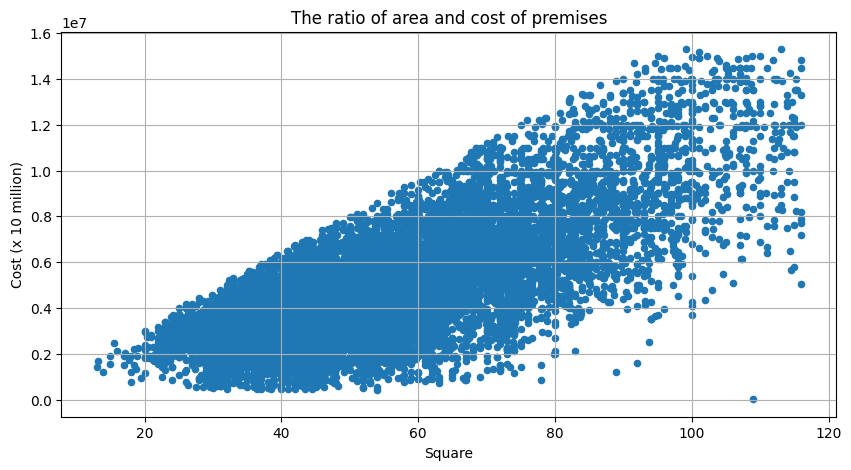

In [754]:
data_1.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), title='The ratio of area and cost of premises')
plt.xlabel('Square')
plt.ylabel('Cost (x 10 million)')
data_1['total_area'].corr(data_1['last_price'])

#### Comment
This graph clearly shows the dependence of the cost of an apartment on its area, despite the fact that there are a small number of deviating values. A correlation of 0.75 confirms the relationship seen on the graph between the selected parameters.

0.4702101042722245

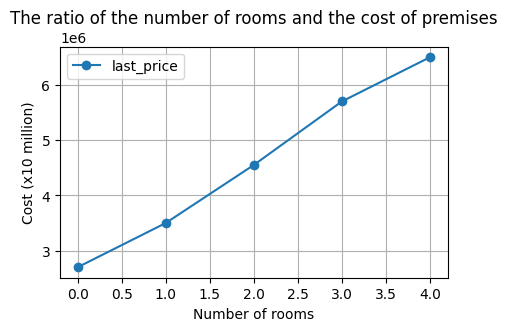

In [755]:
data_1.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(5,3), title='The ratio of the number of rooms and the cost of premises')
plt.xlabel('Number of rooms')
plt.ylabel('Cost (x10 million)')
data_1['rooms'].corr(data_1['last_price'])

#### Comment
The relationship between the number of rooms and the cost of the room is obvious. Although the correlation of 0.5 indicates the average degree of connection of these indicators.

-0.3301499858199321

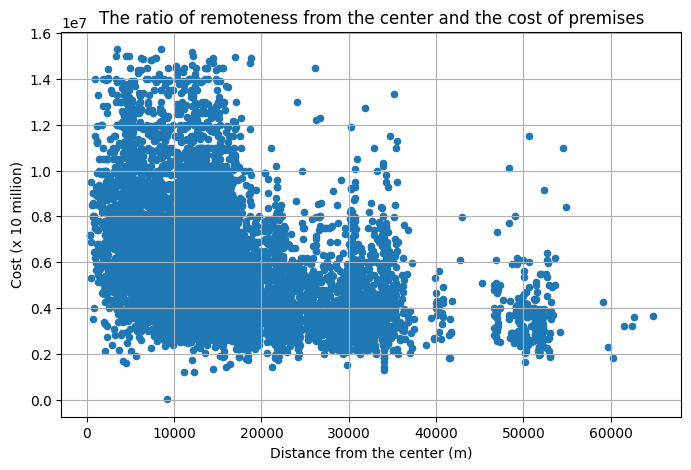

In [756]:
data_1.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(8,5), title='The ratio of remoteness from the center and the cost of premises')
plt.xlabel('Distance from the center (m)')
plt.ylabel('Cost (x 10 million)')
data_1['cityCenters_nearest'].corr(data_1['last_price'])

#### Comment
In this graph, you can pay attention to the accumulation of indicators in the zone up to 20 km, which is caused by the presence in the data of almost half of the ads for the sale of real estate in St. Petersburg. It is also possible to trace a downward trend in cost depending on the distance from the center. White spots, as well as straight lines of values are caused by the presence of omissions and replacement with median values in this column.

0.1581246400022178

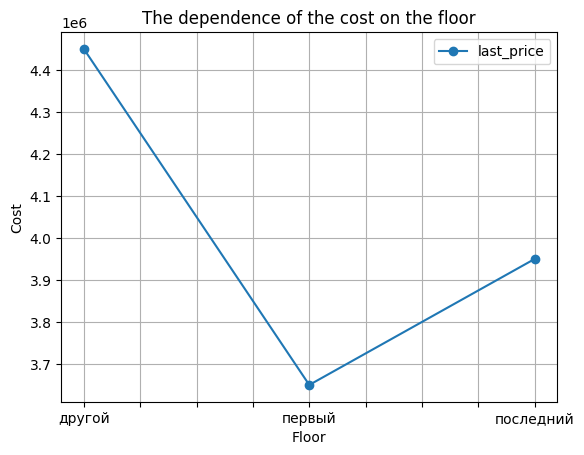

In [757]:
# Floor category
data_1.pivot_table(index='floor_cat', values='last_price', aggfunc='median').plot(style='o-', grid=True, title='The dependence of the cost on the floor')
plt.xlabel('Floor')
plt.ylabel('Cost')
data_1['floor'].corr(data_1['last_price'])

#### Comment
The dependence of the cost of a room on its floor is predictable - the first and last floors are cheaper than the rest by almost 800 and 500 thousand, respectively. The correlation of 0.15 is low due to the presence of a large number of factors affecting the cost of the premises.

-0.014237047539564288

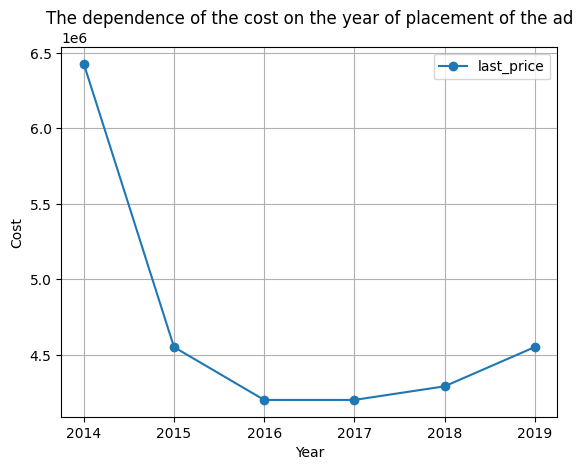

In [758]:
# Year of announcement
data_1.pivot_table(index='year', values='last_price', aggfunc='median').plot(style='o-', grid=True, title='The dependence of the cost on the year of placement of the ad')
plt.xlabel('Year')
plt.ylabel('Cost')
data_1['year'].corr(data_1['last_price'])

#### Comment
The cost of premises decreased significantly in 2015, which was caused by a decrease in demand due to the deterioration of the welfare of citizens. Only by 2018-2019 can you notice a slight increase in prices associated with a reduction in the Central Bank rate, the availability of mortgages and an increase in the pace of housing construction.

0.0069262972860929615

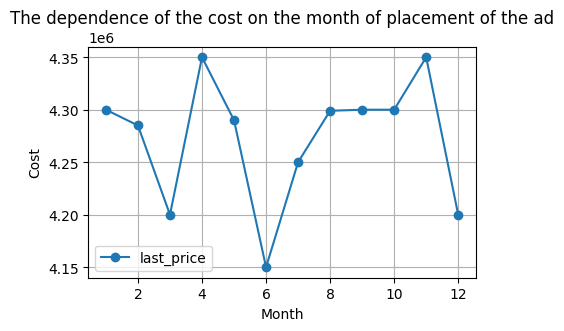

In [759]:
# Month of announcement
data_1.pivot_table(index='month', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(5,3), title='The dependence of the cost on the month of placement of the ad')
plt.xlabel('Month')
plt.ylabel('Cost')
data_1['month'].corr(data_1['last_price'])

#### Comment
As you can see, the cost is not much dependent on the month of putting up for sale. In the most expensive April and November, the cost of premises is higher than the "vacation" June by 200 thousand.

-0.007435800002102798

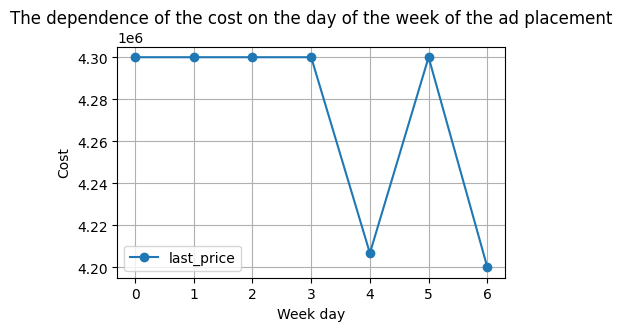

In [760]:
# Day of the week of the announcement
data_1.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(5,3), title='The dependence of the cost on the day of the week of the ad placement')
plt.xlabel('Week day')
plt.ylabel('Cost')
data_1['weekday'].corr(data_1['last_price'])

#### Comment
In the studied parameters, the dependence is almost not traced, but based on the graph, it can be assumed that viewing ads posted on Friday and Sunday will allow you to save up to 100 thousand.

### Investigation of the cost of premises in localities with the largest number of ads.

In [761]:
data_1_pivot = data_1.pivot_table(index= 'locality_name', values= 'price_per_m2', aggfunc=['count', 'mean'])
data_1_pivot.columns = ['Кол-во объявлений', 'Стоимость за кв.м']
data_1_pivot = data_1_pivot.sort_values(by='Кол-во объявлений', ascending=False).head(10)
data_1_pivot = data_1_pivot.sort_values(by='Стоимость за кв.м', ascending=False)
data_1_pivot

,Кол-во объявлений,Стоимость за кв.м
locality_name,,
Санкт-Петербург,11114,103545.340593
Пушкин,266,99601.524868
деревня Кудрово,277,92602.719834
поселок Парголово,292,89472.350768
поселок Мурино,524,85872.485816
поселок Шушары,387,77857.354572
Колпино,291,74716.826825
Гатчина,247,68268.838186
Всеволожск,318,66826.503478


#### Comment
From the summary table obtained and sorted, in accordance with the task, it can be concluded that almost half of the ads for the sale of premises in St. Petersburg, where the average cost per sq.m. is 104 thousand. Vyborg completes the top ten with 187 ads and 57 thousand per sq.m.

### Investigation of the parameters of apartments located in St. Petersburg and its center

In [762]:
# Add a column containing rounded data on the distance to the city center in kilometers.
data_1['km_to_center'] = data_1['cityCenters_nearest'] / 1000
data_1['km_to_center'] = data_1['km_to_center'].apply(np.around)

Text(0, 0.5, 'Cost')

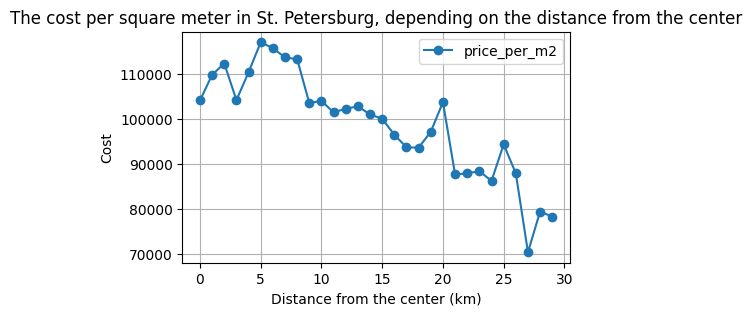

In [763]:
spb_km_to_center = data_1.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='price_per_m2', aggfunc='median')
spb_km_to_center.plot(style='o-', grid=True, figsize=(5,3), title='The cost per square meter in St. Petersburg, depending on the distance from the center')
plt.xlabel('Distance from the center (km)')
plt.ylabel('Cost')

#### Comment
The created graph shows the dependence of distance from the city center and the cost per square meter in St. Petersburg. Despite the fact that 3 km from the center there are premises below the average cost, as well as 20 km from the center there are premises above the average cost, we can pay attention to the steady decline in prices after the 8th kilometer, which gives us reason to believe that the end of the central zone of the city on this border.

In [764]:
km_mean_price = (spb_km_to_center.max() - spb_km_to_center.min()) / len(spb_km_to_center)
km_mean_price

price_per_m2    1557.765152
dtype: float64

#### Comment
The cost of the price per square meter is reduced on average by 1,558 rubles for each kilometer of distance from the city center.

In [765]:
spb = data_1.query('locality_name == "Санкт-Петербург"')
spb_center = spb.query('km_to_center <= 8')
spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().style.format({'last_price': '{:.0f}'})

,total_area,last_price,rooms,ceiling_height
count,11114.000000,11114,11114.000000,11114.000000
mean,53.890347,5548506,1.932608,2.677904
std,18.905965,2265751,0.884519,0.127719
min,13.000000,12190,0.000000,1.000000
25%,39.700000,3950000,1.000000,2.600000
50%,49.900000,4900000,2.000000,2.700000
75%,64.585000,6500000,3.000000,2.700000
max,116.000000,15300000,4.000000,3.150000


In [766]:
# We extract basic data on the area, cost, number of rooms and ceiling height in St. Petersburg and its central part.
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().style.format({'last_price': '{:.0f}'})

,total_area,last_price,rooms,ceiling_height
count,1813.000000,1813,1813.000000,1813.000000
mean,64.338748,7244931,2.242692,2.763701
std,21.660096,2659638,0.900458,0.157828
min,13.200000,1600000,0.000000,2.400000
25%,46.400000,5250000,2.000000,2.700000
50%,62.000000,6800000,2.000000,2.700000
75%,80.000000,8900000,3.000000,2.820000
max,116.000000,15300000,4.000000,3.150000


Text(0, 0.5, 'Number of ads')

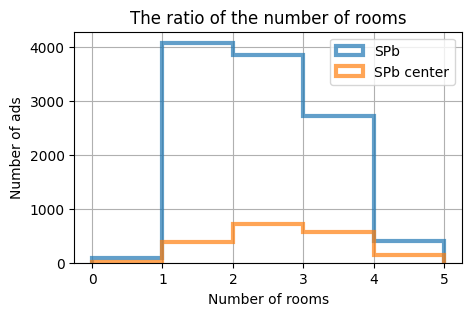

In [767]:
ax = spb.plot(kind='hist', y='rooms', histtype='step', range=(0, 5), bins=5,
    linewidth=3, alpha=0.7, label='SPb', figsize = (5,3), title='The ratio of the number of rooms')
spb_center.plot(kind='hist', y='rooms', histtype='step',range=(0, 5), bins=5,
    linewidth=3, alpha=0.7, label='SPb center', ax=ax, grid=True, legend=True)
plt.xlabel('Number of rooms')
plt.ylabel('Number of ads')

#### Comment
From this graph, it can be concluded that premises with a large number of rooms are more often sold in the city center, and 4-room premises in the center make up slightly less than half of such ads throughout the city.

Text(0, 0.5, 'Number of ads')

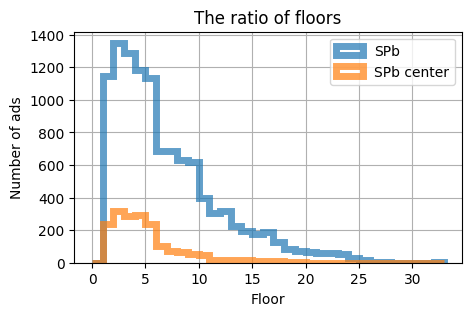

In [768]:
ax = spb.plot(kind='hist', y='floor', histtype='step', range=(0, 33), bins=33,
    linewidth=5, alpha=0.7, label='SPb', figsize = (5,3), title='The ratio of floors')
spb_center.plot(kind='hist', y='floor', histtype='step',range=(0, 33), bins=33,
    linewidth=5, alpha=0.7, label='SPb center', ax=ax, grid=True, legend=True)
plt.xlabel('Floor')
plt.ylabel('Number of ads')

#### Comment
Since mostly low-rise buildings are concentrated in the central part of the city, most of the ads for the sale of premises in this part of the city are limited to the 5th floor. Throughout the city, most of the ads are also rooms up to the fifth floor, however, there is a significant part of the ads up to the 25th floor.

Text(0, 0.5, 'Number of ads')

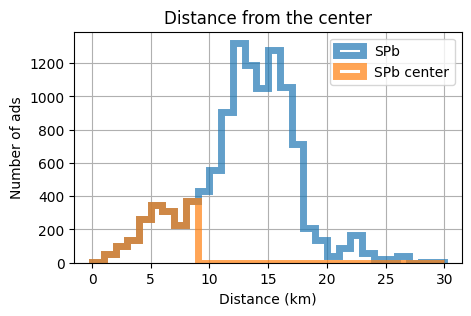

In [769]:
ax = spb.plot(kind='hist', y='km_to_center', histtype='step', range=(0, 30), bins=30,
    linewidth=5, alpha=0.7, label='SPb', figsize = (5,3),  title='Distance from the center')
spb_center.plot(kind='hist', y='km_to_center', histtype='step',range=(0, 30), bins=30,
    linewidth=5, alpha=0.7, label='SPb center', ax=ax, grid=True, legend=True)
plt.xlabel('Distance (km)')
plt.ylabel('Number of ads')

#### Comment
As we already know from the study of the main displays, the premises for sale in the center make up a sixth of all the ads for sale in the city, which is perfectly visible on the graph. Most of the premises in the center are located 5-8 km away. In the city, the remoteness of the main part of the premises for sale is 10-17 km.

Text(0, 0.5, 'Number of ads')

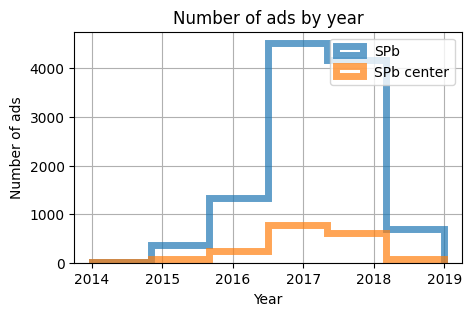

In [770]:
ax = spb.plot(kind='hist', y='year', histtype='step', range=(2014, 2019), bins=6,
    linewidth=5, alpha=0.7, label='SPb', figsize = (5,3),  title='Number of ads by year')
spb_center.plot(kind='hist', y='year', histtype='step',range=(2014, 2019), bins=6,
    linewidth=5, alpha=0.7, label='SPb center', ax=ax, grid=True, legend=True)
plt.xlabel('Year')
plt.ylabel('Number of ads')

#### Comment
The data on the graph is evenly distributed relative to each other. Most of the ads for sale were in 2017 and 2018, which is correlated with the previously obtained data on the low price of apartments in these years.

### Summary

In this section, we have established the characteristics of the premises, the ads for the sale of which are most common. Most often, premises with an area of 30-60 sq.m. are sold, with a cost of 50-150 thousand per square meter, up to 10 million per room, having 2-4 rooms, with a ceiling height of 2.5 to 2.7 meters. The sale of premises always takes place in very different terms, as the median value shows, this happens in three months. It was also found that the fundamental factor in the formation of the cost of a room is its area with a correlation of 0.75, and the date of placement of the ad plays a small role in this matter. In addition, the central zone of the city was established and the indicators of the premises sold in it were compared with the ads for sale throughout the city. Based on the data obtained, it is possible to confirm the theory that housing in the center is more expensive, larger, located on low floors and sold less often.

## General Conclusions and Recommendations

The results obtained in the course of the study have a small share of subjectivity, since there is no connection with those involved in the formation of data. In this matter, it is very difficult to separate abnormal indicators from real ones, since the real estate market is extremely diverse and a huge number of factors that are not reflected in the data provided can affect the final cost of the premises. In turn, in order to obtain results as close to reality as possible, the gaps were filled in only in cases where they could be grouped with other room parameters. In other situations, the omissions were left because their incorrect filling could have an extremely negative impact on the results of the study. Despite this, the results of the study turned out to be extremely informative, visual and do not go beyond the objective reality.